In [1]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.25)

In [40]:
df_nest = pd.read_csv("output/gridsearch/gridsearch_hparams_nestimators.csv")
df_nest['num_estimators'] = df_nest['params'].apply(lambda x: ast.literal_eval(x)['n_estimators']).astype(int)
df_nest = df_nest.set_index("num_estimators").drop(index=[20, 30, 75, 750, 1000]).reset_index()
df_nest.drop(columns="params", inplace=True)
df_nest.sort_values(by=['num_estimators'], inplace=True, ignore_index=True)
df_nest

,num_estimators,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
0,10,0.82715,0.68925,0.75494,0.83220,0.69577,0.76222,0.75711
1,50,0.85143,0.76244,0.79185,0.86339,0.77936,0.80875,0.80191
2,100,0.85791,0.77387,0.80117,0.87699,0.80169,0.82808,0.81098
3,200,0.86176,0.78010,0.80663,0.89186,0.82509,0.84899,0.81616
4,300,0.86314,0.78217,0.80856,0.90148,0.84048,0.86246,0.81796
5,500,0.86295,0.78227,0.80829,0.91393,0.86137,0.87989,0.81784


In [41]:
df_nleaves = pd.read_csv("output/gridsearch/gridsearch_hparams_nleaves.csv")
df_nleaves['num_leaves'] = df_nleaves['params'].apply(lambda x: ast.literal_eval(x)['num_leaves']).astype(int)
df_nleaves.drop(columns="params", inplace=True)
df_nleaves = df_nleaves.set_index("num_leaves").reset_index()
df_nleaves.sort_values(by=['num_leaves'], inplace=True, ignore_index=True)
df_nleaves

,num_leaves,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
0,10,0.85666,0.77201,0.79938,0.86805,0.78760,0.81543,0.80935
1,20,0.85979,0.77745,0.80390,0.87832,0.80396,0.82996,0.81371
2,30,0.86133,0.77992,0.80608,0.88585,0.81549,0.84056,0.81578
3,40,0.86135,0.78002,0.80611,0.89028,0.82271,0.84679,0.81583
4,50,0.86227,0.78125,0.80739,0.89486,0.82975,0.85321,0.81697
5,70,0.86314,0.78217,0.80856,0.90148,0.84048,0.86246,0.81796
6,90,0.86326,0.78224,0.80869,0.90568,0.84760,0.86835,0.81806
7,110,0.86383,0.78283,0.80946,0.90869,0.85266,0.87255,0.81871


In [42]:
df_maxdepth = pd.read_csv("output/gridsearch/gridsearch_hparams_maxdepth.csv")
df_maxdepth['max_depth'] = df_maxdepth['params'].apply(lambda x: ast.literal_eval(x)['max_depth']).astype(int)
df_maxdepth.drop(columns="params", inplace=True)
df_maxdepth = df_maxdepth.set_index("max_depth").reset_index()
df_maxdepth.sort_values(by=['max_depth'], inplace=True, ignore_index=True)
df_maxdepth

,max_depth,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
0,3,0.85441,0.76762,0.79614,0.86279,0.77897,0.80796,0.80606
1,5,0.86100,0.77871,0.80558,0.88275,0.81059,0.83619,0.81510
2,7,0.86314,0.78217,0.80856,0.90148,0.84048,0.86246,0.81796
3,9,0.86191,0.78107,0.80690,0.90236,0.84221,0.86370,0.81663
4,12,0.86179,0.78079,0.80671,0.90317,0.84365,0.86482,0.81643
5,15,0.86144,0.78038,0.80625,0.90256,0.84287,0.86396,0.81602
6,20,0.86100,0.77996,0.80564,0.90251,0.84238,0.86391,0.81553


In [45]:
# Show the parameters that give the best test accuracy
display(df_nest.sort_values("mean_test_accuracy").tail(1))
display(df_nleaves.sort_values("mean_test_accuracy").tail(1))
display(df_maxdepth.sort_values("mean_test_accuracy").tail(1))

,num_estimators,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
4,300,0.86314,0.78217,0.80856,0.90148,0.84048,0.86246,0.81796


,num_leaves,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
7,110,0.86383,0.78283,0.80946,0.90869,0.85266,0.87255,0.81871


,max_depth,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
2,7,0.86314,0.78217,0.80856,0.90148,0.84048,0.86246,0.81796


In [46]:
# Show the parameters that give the best test F1-macro
display(df_nest.sort_values("mean_test_f1_macro").tail(1))
display(df_nleaves.sort_values("mean_test_f1_macro").tail(1))
display(df_maxdepth.sort_values("mean_test_f1_macro").tail(1))

,num_estimators,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
5,500,0.86295,0.78227,0.80829,0.91393,0.86137,0.87989,0.81784


,num_leaves,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
7,110,0.86383,0.78283,0.80946,0.90869,0.85266,0.87255,0.81871


,max_depth,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores
2,7,0.86314,0.78217,0.80856,0.90148,0.84048,0.86246,0.81796


In [48]:
# Define custom function that takes into account the gap between training and testing scores: lower is better
# https://www.jeffchiou.com/blog/hyperparameter-optimization-optuna/
# In this case the RMSE of the difference between testing and training is
# weighted four times less than the test accuracy.

def custom_loss_function(df, target="accuracy", weight=4):
    """Lower is better!"""
    test = df['mean_test_%s' % target]
    train = df['mean_train_%s' % target]
    return np.sqrt((test - train)**2) + weight * (1 - test)

In [49]:
df_nest['custom_loss'] = df_nest.apply(custom_loss_function, axis=1)
df_nleaves['custom_loss'] = df_nleaves.apply(custom_loss_function, axis=1)
df_maxdepth['custom_loss'] = df_maxdepth.apply(custom_loss_function, axis=1)

display(df_nest.sort_values("custom_loss").head(1))
display(df_nleaves.sort_values("custom_loss").head(1))
display(df_maxdepth.sort_values("custom_loss").head(1))

,num_estimators,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores,custom_loss
3,200,0.86176,0.7801,0.80663,0.89186,0.82509,0.84899,0.81616,0.58306


,num_leaves,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores,custom_loss
2,30,0.86133,0.77992,0.80608,0.88585,0.81549,0.84056,0.81578,0.5792


,max_depth,mean_test_accuracy,mean_test_f1_macro,mean_test_mcc,mean_train_accuracy,mean_train_f1_macro,mean_train_mcc,mean_test_scores,custom_loss
1,5,0.861,0.77871,0.80558,0.88275,0.81059,0.83619,0.8151,0.57775


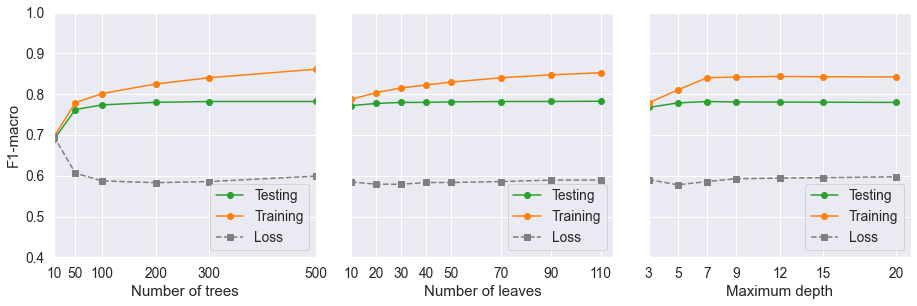

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=False, figsize=(13, 4.5));

target = "f1_macro"

ax1.plot(df_nest['num_estimators'], df_nest['mean_test_%s' % target], marker="o", label="Testing", color="tab:green")
ax1.plot(df_nest['num_estimators'], df_nest['mean_train_%s' % target], marker="o", label="Training", color="tab:orange")
ax1.plot(df_nest['num_estimators'], df_nest['custom_loss'], marker="s", ls="--", label="Loss", color="tab:grey")

ax2.plot(df_nleaves['num_leaves'], df_nleaves['mean_test_%s' % target], marker="o", label="Testing", color="tab:green")
ax2.plot(df_nleaves['num_leaves'], df_nleaves['mean_train_%s' % target], marker="o", label="Training", color="tab:orange")
ax2.plot(df_nleaves['num_leaves'], df_nleaves['custom_loss'], marker="s", ls="--", label="Loss", color="tab:grey")

ax3.plot(df_maxdepth['max_depth'], df_maxdepth['mean_test_%s' % target], marker="o", label="Testing", color="tab:green")
ax3.plot(df_maxdepth['max_depth'], df_maxdepth['mean_train_%s' % target], marker="o", label="Training", color="tab:orange")
ax3.plot(df_maxdepth['max_depth'], df_maxdepth['custom_loss'], marker="s", ls="--", label="Loss", color="tab:grey")

if target == "f1_macro":
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("F1-macro")
else:
    ax1.set_ylim(0.4, 1)
    # ax1.set_yticks([0.80, 0.825, 0.85, 0.875, 0.90, 0.925, 0.950])
    # ax1.set_yticklabels([80.0, 82.5, 85.0, 87.5, 90.0, 92.5, 95.0])
    ax1.set_ylabel("Accuracy")

ax1.set_xlim(10, 500)
ax1.set_xlabel("Number of trees")
ax1.set_xticks(df_nest["num_estimators"])

ax2.set_xlim(10, 115)
ax2.set_xlabel("Number of leaves")
ax2.set_xticks(df_nleaves["num_leaves"])

ax3.set_xlim(3, 21)
ax3.set_xlabel("Maximum depth")
ax3.set_xticks(df_maxdepth["max_depth"])

ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax3.legend(loc="lower right")

fig.align_labels()

plt.tight_layout()